# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://i.imgur.com/cxBpQ3I.png height=400></center>


### Upgrade Plotly

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


###  Import Statements


In [56]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,cross_val_score

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [4]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understand the Dataset

Have a look at the file entitled `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎

**Challenge**

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [6]:
df_data.shape

(2000, 96)

In [7]:
df_data.columns

Index(['ID', 'EARNINGS', 'S', 'EXP', 'FEMALE', 'MALE', 'BYEAR', 'AGE',
       'AGEMBTH', 'HHINC97', 'POVRAT97', 'HHBMBF', 'HHBMOF', 'HHOMBF',
       'HHBMONLY', 'HHBFONLY', 'HHOTHER', 'MSA97NO', 'MSA97NCC', 'MSA97CC',
       'MSA97NK', 'ETHBLACK', 'ETHHISP', 'ETHWHITE', 'EDUCPROF', 'EDUCPHD',
       'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO',
       'PRMONM', 'PRMONF', 'PRMSTYUN', 'PRMSTYPE', 'PRMSTYAN', 'PRMSTYAE',
       'PRFSTYUN', 'PRFSTYPE', 'PRFSTYAN', 'PRFSTYAE', 'SINGLE', 'MARRIED',
       'COHABIT', 'OTHSING', 'FAITHN', 'FAITHP', 'FAITHC', 'FAITHJ', 'FAITHO',
       'FAITHM', 'ASVABAR', 'ASVABWK', 'ASVABPC', 'ASVABMK', 'ASVABNO',
       'ASVABCS', 'ASVABC', 'ASVABC4', 'VERBAL', 'ASVABMV', 'HEIGHT',
       'WEIGHT04', 'WEIGHT11', 'SF', 'SM', 'SFR', 'SMR', 'SIBLINGS', 'REG97NE',
       'REG97NC', 'REG97S', 'REG97W', 'RS97RURL', 'RS97URBN', 'RS97UNKN',
       'JOBS', 'HOURS', 'TENURE', 'CATGOV', 'CATPRI', 'CATNPO', 'CATMIS',
       'CATSE', 'COLLBARG', 'URBAN'

In [11]:
df_data.isna().sum()[:50]

ID             0
EARNINGS       0
S              0
EXP            0
FEMALE         0
MALE           0
BYEAR          0
AGE            0
AGEMBTH       44
HHINC97      370
POVRAT97     373
HHBMBF         0
HHBMOF         0
HHOMBF         0
HHBMONLY       0
HHBFONLY       0
HHOTHER        0
MSA97NO        0
MSA97NCC       0
MSA97CC        0
MSA97NK        0
ETHBLACK       0
ETHHISP        0
ETHWHITE       0
EDUCPROF       0
EDUCPHD        0
EDUCMAST       0
EDUCBA         0
EDUCAA         0
EDUCHSD        0
EDUCGED        0
EDUCDO         0
PRMONM       879
PRMONF      1073
PRMSTYUN     533
PRMSTYPE     533
PRMSTYAN     533
PRMSTYAE     533
PRFSTYUN     790
PRFSTYPE     790
PRFSTYAN     790
PRFSTYAE     790
SINGLE         0
MARRIED        0
COHABIT        0
OTHSING        0
FAITHN         0
FAITHP         0
FAITHC         0
FAITHJ         0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Find and remove any duplicate rows.

In [9]:
df_data.isna().values.any()

True

In [16]:
for label,column in df_data.items():
    if column.isna().values.any():
        df_data[label] = column.fillna(column.median())

In [18]:
df_data.isna().sum()[:50]

ID          0
EARNINGS    0
S           0
EXP         0
FEMALE      0
MALE        0
BYEAR       0
AGE         0
AGEMBTH     0
HHINC97     0
POVRAT97    0
HHBMBF      0
HHBMOF      0
HHOMBF      0
HHBMONLY    0
HHBFONLY    0
HHOTHER     0
MSA97NO     0
MSA97NCC    0
MSA97CC     0
MSA97NK     0
ETHBLACK    0
ETHHISP     0
ETHWHITE    0
EDUCPROF    0
EDUCPHD     0
EDUCMAST    0
EDUCBA      0
EDUCAA      0
EDUCHSD     0
EDUCGED     0
EDUCDO      0
PRMONM      0
PRMONF      0
PRMSTYUN    0
PRMSTYPE    0
PRMSTYAN    0
PRMSTYAE    0
PRFSTYUN    0
PRFSTYPE    0
PRFSTYAN    0
PRFSTYAE    0
SINGLE      0
MARRIED     0
COHABIT     0
OTHSING     0
FAITHN      0
FAITHP      0
FAITHC      0
FAITHJ      0
dtype: int64

## Descriptive Statistics

In [32]:
df_data.describe()


,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00",...,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,"3,530.89",18.87,14.58,6.72,0.50,0.50,"1,982.05",28.95,26.41,"56,730.03",...,0.78,0.15,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,023.07",11.95,2.74,2.84,0.50,0.50,1.39,1.39,4.98,"38,701.55",...,0.43,0.36,0.44,0.48,0.42,0.21,0.50,0.49,0.06,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,825.00",11.54,12.00,4.69,0.00,0.00,"1,981.00",28.00,23.00,"36,200.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,471.50",15.75,15.00,6.63,0.50,0.50,"1,982.00",29.00,26.00,"50,502.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,158.25",22.70,16.00,8.70,1.00,1.00,"1,983.00",30.00,30.00,"66,350.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


## Visualize The Features

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE', ylabel='EARNINGS'>

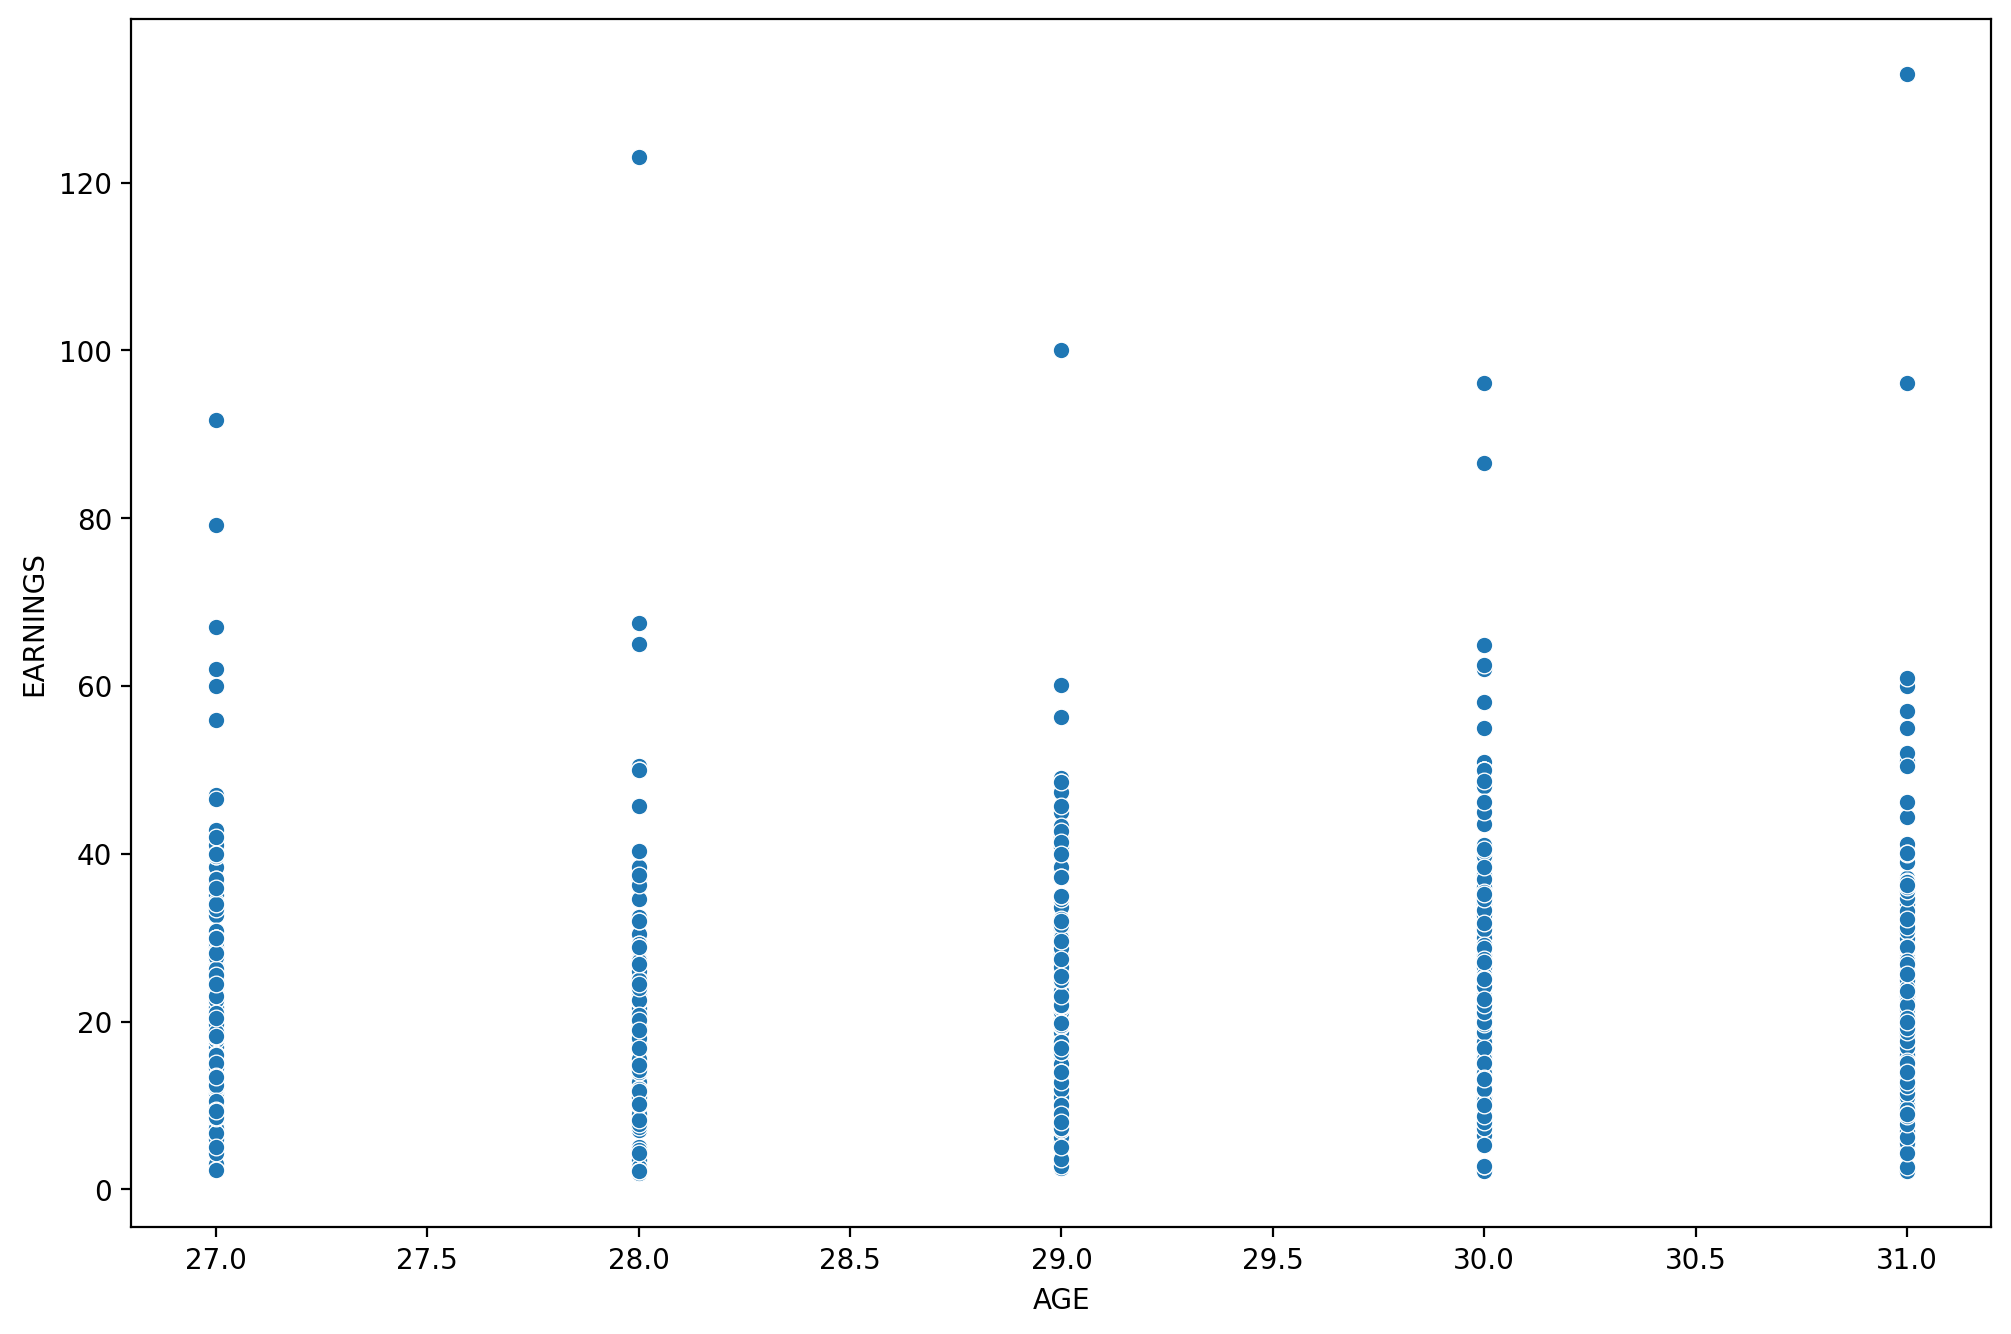

In [31]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(df_data.AGE,df_data.EARNINGS)

<BarContainer object of 2000 artists>

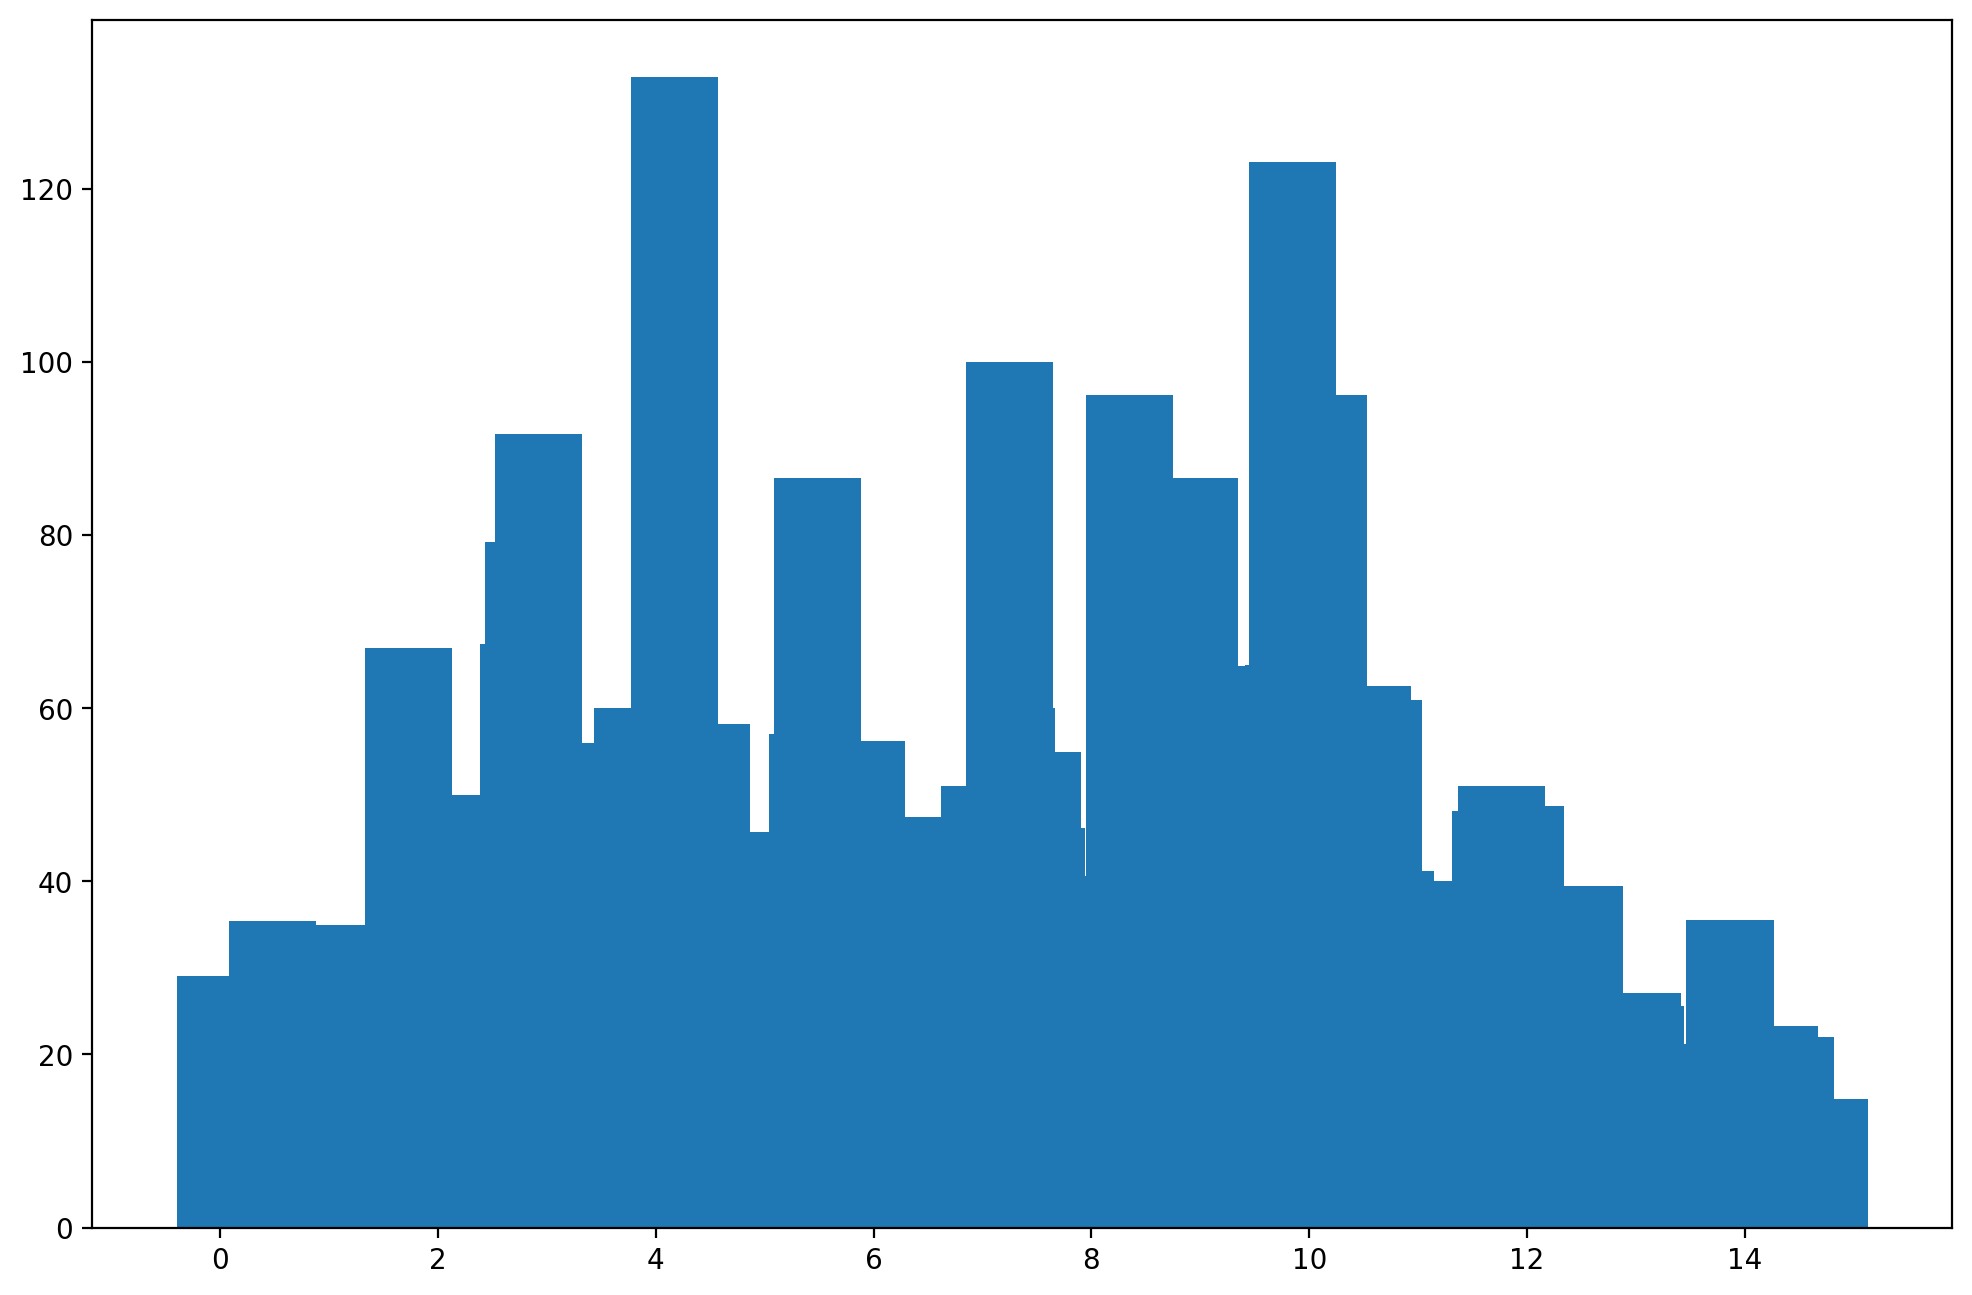

In [28]:
plt.figure(figsize=(12,8),dpi=200)
plt.bar(df_data.EXP,df_data.EARNINGS)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXP', ylabel='EARNINGS'>

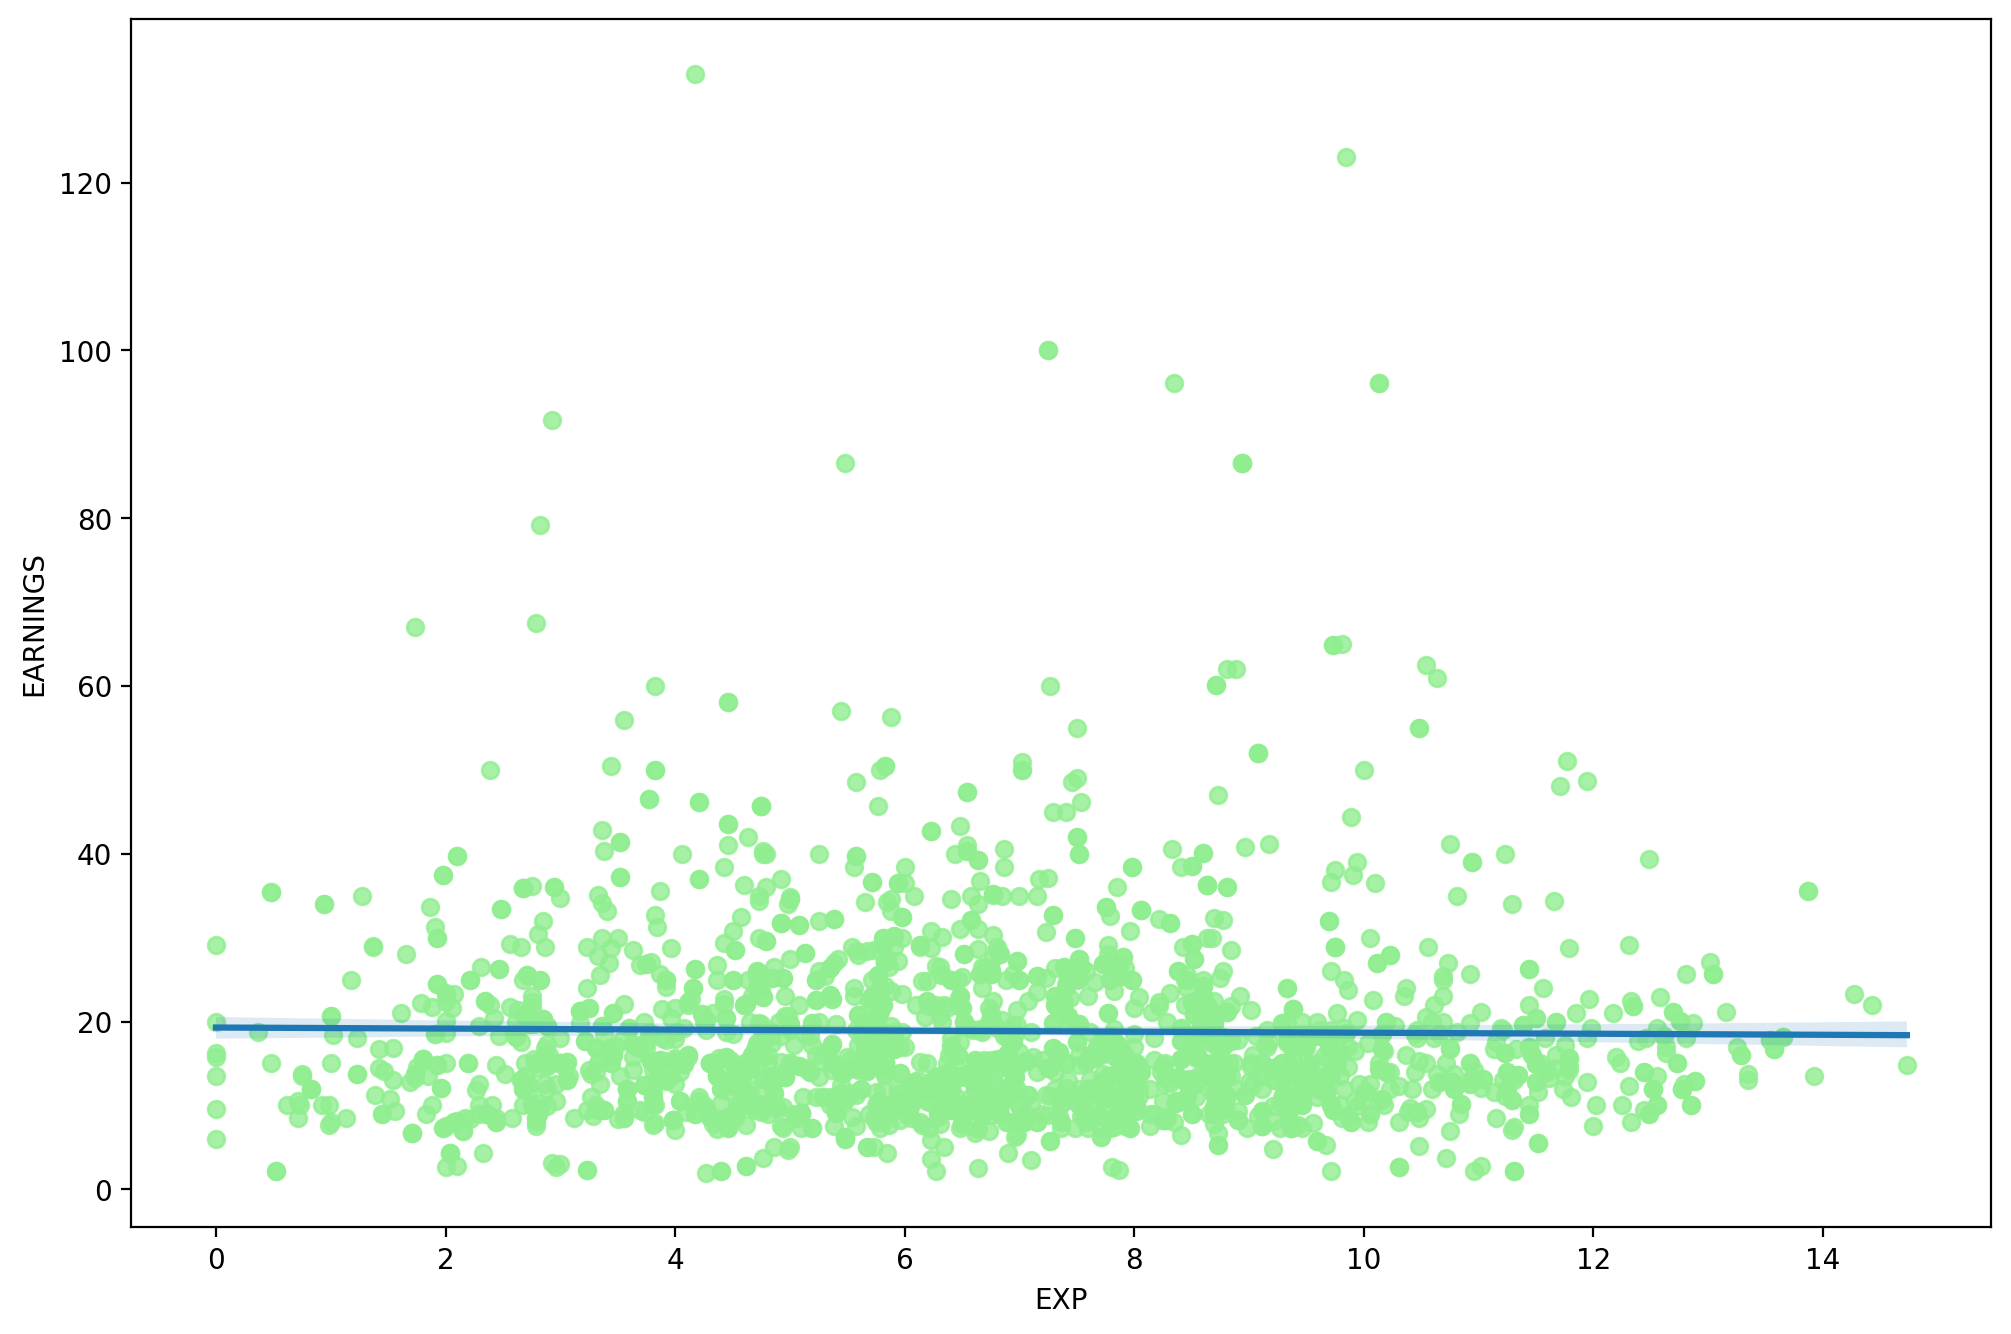

In [30]:
plt.figure(figsize=(12,8),dpi=200)
sns.regplot(df_data.EXP,df_data.EARNINGS,scatter_kws={"color":"lightgreen"})

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [33]:
len(df_data)

2000

In [42]:
df_data

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,"50,502.00",...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2456,14.00,8,7.87,1,0,1982,29,19.00,"6,000.00",...,1,1,0,0,0,0,1,0,0,0
1996,1119,14.83,18,1.92,1,0,1983,28,28.00,"50,000.00",...,1,1,0,0,0,0,1,0,0,0
1997,3561,35.88,18,2.67,1,0,1984,27,29.00,"77,610.00",...,1,0,0,1,0,0,0,1,0,0
1998,5980,25.48,16,4.71,1,0,1982,29,23.00,"69,300.00",...,0,0,0,1,0,0,1,0,0,0


In [41]:
def train_val_test_split(dataFrame):
    """
    Returns the train, test and validation split of a dataset
    """
    np.random.seed= 42
    dataFrame_shuffled = dataFrame.sample(frac=1)
    X = dataFrame_shuffled.drop("EARNINGS",axis=1)
    y= dataFrame_shuffled.EARNINGS
    train_split = round(0.7 * len(dataFrame_shuffled))
    valid_split = round(train_split + 0.15 * len(dataFrame_shuffled))
    X_train,y_train = X[:train_split],y[:train_split]
    X_valid,y_valid = X[train_split:valid_split],y[train_split:valid_split]
    X_test,y_test = X[valid_split:],y[valid_split:]
    return X_train,X_valid,X_test,y_train,y_valid,y_test

In [43]:
X_train,X_valid,X_test,y_train,y_valid,y_test = train_val_test_split(df_data)

In [44]:
len(X_train),len(X_valid),len(X_test)

(1400, 300, 300)

We will use the train data to train the machine learning model, the use the validation set to evaluate the model. We will keep the test data to predict results

# Modelling

We'll create a function to evaluate our model on different machine learning algorithms

In [53]:
def modelling(X_train,X_valid,y_train,y_valid):
    """
    This function will check our data on different models and return their score
    """
    linear_model = LinearRegression(n_jobs=-1)
    linear_model.fit(X_train,y_train)
    linear_score = linear_model.score(X_valid,y_valid)
    
    
    random_model = RandomForestRegressor(n_estimators=100,n_jobs=-1)
    random_model.fit(X_train,y_train)
    random_score = random_model.score(X_valid,y_valid)
    
    model_scores = {"Linear Regression":linear_score,"Random Forest Regression": random_score}
    return model_scores

In [55]:
model_scores = modelling(X_train,X_valid,y_train,y_valid)
model_scores

{'Linear Regression': 0.12946291935198972,
 'Random Forest Regression': 0.4517071621923987}

Now we've seen that Random Forest Regressor model performs way better than the Linear Model on our validation set.
Let's see how it performs on cross validation

In [61]:
np.random.state=42
X = df_data.drop("EARNINGS",axis=1)
y = df_data.EARNINGS
regr = RandomForestRegressor(n_estimators=100,random_state=42,n_jobs=-1)
cv_mae = round(np.mean(cross_val_score(regr,X,y,cv=5,scoring="neg_mean_absolute_error")),2)
cv_mse = round(np.mean(cross_val_score(regr,X,y,cv=5,scoring="neg_mean_squared_error")),2)
cv_r2 = round(np.mean(cross_val_score(regr,X,y,cv=5,scoring="r2")),2)
print(cv_mae,cv_mse,cv_r2)

-4.73 -69.64 0.53


## Improving the model

Let's improve our model by tuning it's hyperparameters using RandomizedSearchCV and GridSearchCV

In [64]:
grid = {"n_estimators":np.arange(10,200,10),"max_features":[0.5,0.75,1.0,"auto","sqrt"],"min_samples_split":np.arange(2,10,2),"min_samples_leaf":np.arange(2,10,2),"max_depth":[None,2,4]}
model = RandomForestRegressor(n_jobs=-1,random_state=42)
rs_model = RandomizedSearchCV(model,grid,n_iter=10,cv=5,verbose=True)
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 2, 4],
                                        'max_features': [0.5, 0.75, 1.0, 'auto',
                                                         'sqrt'],
                                        'min_samples_leaf': array([2, 4, 6, 8]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   verbose=True)

In [65]:
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [66]:
rs_model.best_score_

0.3181757282757285

In [68]:
rs_model.score(X_valid,y_valid)

0.40701761433838557

In [67]:
gs_model = GridSearchCV(model,grid,cv=5,verbose=True)
gs_model.fit(X_train,y_train) 

Fitting 5 folds for each of 4560 candidates, totalling 22800 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [None, 2, 4],
                         'max_features': [0.5, 0.75, 1.0, 'auto', 'sqrt'],
                         'min_samples_leaf': array([2, 4, 6, 8]),
                         'min_samples_split': array([2, 4, 6, 8]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
             verbose=True)

### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [69]:
gs_model.score(X_valid,y_valid)

0.4625550653116528

In [70]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 190}

In [72]:
best_model = RandomForestRegressor(max_depth= None,max_features = 0.5,min_samples_leaf = 2,min_samples_split= 2,n_estimators = 190,n_jobs=-1,random_state=42)

In [73]:
best_model.fit(X_train,y_train)

RandomForestRegressor(max_features=0.5, min_samples_leaf=2, n_estimators=190,
                      n_jobs=-1, random_state=42)

In [74]:
best_model.score(X_valid,y_valid)

0.4625550653116528

In [77]:
y_preds = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid,y_preds)
mse = mean_squared_error(y_valid,y_preds)
r2 = r2_score(y_valid,y_preds)

In [78]:
mae , mse , r2

(4.961772271119718, 54.95031363031225, 0.4625550653116529)

### Predicting the results on the test data

we will now test our model on the test data 

In [82]:
best_model.score(X_test,y_test)

0.3219301424747154

In [86]:
y_preds = best_model.predict(X_test)
predicted_df  = pd.DataFrame()
predicted_df["ID"] = X_test["ID"]
predicted_df["S"] = X_test["S"]
predicted_df["EXP"] = X_test["EXP"]
predicted_df["EARNINGS"] = y_preds
predicted_df

,ID,S,EXP,EARNINGS
1046,2487,14,6.71,23.14
1255,672,16,6.02,14.35
245,297,12,7.40,16.25
1005,278,12,12.56,26.15
786,109,16,7.15,25.88
...,...,...,...,...
1865,6528,13,4.87,13.95
585,3135,12,8.50,16.94
287,584,18,6.46,29.95
52,1711,12,6.23,18.53


In [88]:
best_model.feature_importances_

array([4.65416039e-02, 4.85207052e-02, 5.79140747e-02, 4.40003578e-03,
       5.16146529e-03, 8.40676555e-03, 1.03168104e-02, 1.75887569e-02,
       3.73347734e-02, 3.12965361e-02, 1.59807311e-03, 3.81782056e-04,
       6.65269981e-05, 3.51788849e-03, 3.69545755e-04, 2.30610071e-04,
       1.13907603e-03, 2.22384884e-03, 1.59743713e-03, 4.27458698e-07,
       9.61451472e-04, 1.97626424e-03, 2.49655418e-03, 2.06084142e-02,
       0.00000000e+00, 1.81378946e-03, 3.35159734e-03, 1.59229788e-03,
       3.45224160e-03, 2.58817489e-04, 8.69990605e-04, 7.34300594e-03,
       7.03641294e-03, 1.75189499e-03, 2.19345996e-03, 1.11074338e-03,
       1.68664814e-03, 1.01914983e-03, 2.40133335e-03, 1.11434208e-03,
       1.26786498e-03, 3.37405137e-03, 4.51505715e-03, 9.44597321e-03,
       2.32575377e-04, 6.23238069e-04, 3.63635175e-03, 4.01473444e-03,
       2.53382932e-04, 2.12149686e-03, 5.34222458e-03, 6.33425789e-02,
       2.26252002e-02, 2.07376614e-02, 5.92535098e-02, 3.40757013e-02,
      

In [104]:
def plot_features(columns,importances,n=20):
    df = (pd.DataFrame({"features":columns,"feature_importances":importances}).sort_values("feature_importances",ascending=True).reset_index(drop=True))
    plt.figure(figsize=(12,8),dpi=200)
    
    fig, ax = plt.subplots()
    ax.bar(df["features"][:n],df["feature_importances"][:n])
    ax.invert_yaxis
    return df

<Figure size 2400x1600 with 0 Axes>

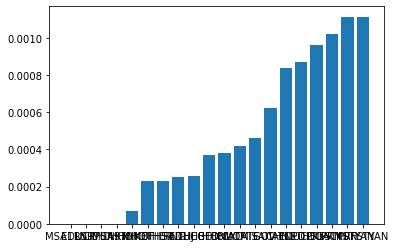

In [105]:
df = plot_features(X_train.columns,best_model.feature_importances_)

In [107]:
df.sort_values("feature_importances",ascending=False)

,features,feature_importances
94,ASVABAR,0.06
93,ASVABMK,0.06
92,EXP,0.06
91,S,0.05
90,HOURS,0.05
...,...,...
4,HHOMBF,0.00
3,MSA97NK,0.00
2,RS97UNKN,0.00
1,EDUCPHD,0.00


In [108]:
import joblib
joblib.dump(best_model,"best_model.sav")


['best_model.sav']

In [109]:
loaded_model = joblib.load("best_model.sav")

In [114]:
df_data = pd.read_csv('NLSY97_subset.csv')

In [115]:
df_data.isna().sum()[:50]

ID             0
EARNINGS       0
S              0
EXP            0
FEMALE         0
MALE           0
BYEAR          0
AGE            0
AGEMBTH       44
HHINC97      370
POVRAT97     373
HHBMBF         0
HHBMOF         0
HHOMBF         0
HHBMONLY       0
HHBFONLY       0
HHOTHER        0
MSA97NO        0
MSA97NCC       0
MSA97CC        0
MSA97NK        0
ETHBLACK       0
ETHHISP        0
ETHWHITE       0
EDUCPROF       0
EDUCPHD        0
EDUCMAST       0
EDUCBA         0
EDUCAA         0
EDUCHSD        0
EDUCGED        0
EDUCDO         0
PRMONM       879
PRMONF      1073
PRMSTYUN     533
PRMSTYPE     533
PRMSTYAN     533
PRMSTYAE     533
PRFSTYUN     790
PRFSTYPE     790
PRFSTYAN     790
PRFSTYAE     790
SINGLE         0
MARRIED        0
COHABIT        0
OTHSING        0
FAITHN         0
FAITHP         0
FAITHC         0
FAITHJ         0
dtype: int64

In [116]:
for label,column in df_data.items():
    if column.isna().values.any():
        df_data[label] = column.fillna(column.mean())

In [118]:
X_train,X_test,y_train,y_test = train_test_split(df_data.drop("EARNINGS",axis=1),df_data.EARNINGS,test_size=0.2,random_state=42)

In [119]:
best_model.score(X_test,y_test)

0.7486739045133962

In [ ]:
y_preds = best_model.predict(X_valid)
mae = mean_absolute_error(y_valid,y_preds)
mse = mean_squared_error(y_valid,y_preds)
r2 = r2_score(y_valid,y_preds)